# **Logistic Regression**

In [ ]:
data = 'Step_datasets_14.csv'

df = pd.read_csv(data)

In [ ]:
# view dimensions of dataset

df.shape

(2030, 11)

In [ ]:
print(df.columns.value_counts());

KEY           1
ENTITY        1
D0            1
D1            1
D2            1
D3            1
D4            1
D5            1
D6            1
D7            1
REFERENCES    1
Name: count, dtype: int64


In [ ]:
df.drop(['ENTITY'], axis=1, inplace=True)

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY         2030 non-null   int64  
 1   D0          2030 non-null   float64
 2   D1          2030 non-null   float64
 3   D2          2030 non-null   float64
 4   D3          2030 non-null   float64
 5   D4          2030 non-null   float64
 6   D5          2030 non-null   float64
 7   D6          2030 non-null   float64
 8   D7          2030 non-null   float64
 9   REFERENCES  2030 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
df.columns.isnull().sum()

0

In [ ]:
df['KEY'].unique()

array([   1,    2,    3, ..., 2032, 2033, 2034])

In [ ]:
print(round(df['D0'].describe()),2)

count    2030.0
mean       18.0
std       151.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max      2012.0
Name: D0, dtype: float64 2


In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1624, 10), (406, 10))

In [ ]:


import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['D1'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.drop(['REFERENCES'], axis=1, inplace=True)

X_test.drop(['REFERENCES'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['CARTESIAN_POINT', 'DIRECTION', 'ORIENTED_EDGE', 'CARTESIAN_POINT',
       'ORIENTED_EDGE', 'CARTESIAN_POINT', 'CARTESIAN_POINT',
       'CARTESIAN_POINT', 'CARTESIAN_POINT', 'DIRECTION',
       'CARTESIAN_POINT', 'DIRECTION', 'ORIENTED_EDGE', 'ORIENTED_EDGE',
       'VECTOR', 'DIRECTION', 'DIRECTION', 'CARTESIAN_POINT',
       'CARTESIAN_POINT', 'EDGE_CURVE', 'DIRECTION', 'DIRECTION',
       'EDGE_CURVE', 'DIRECTION', 'CARTESIAN_POINT', 'DIRECTION',
       'ORIENTED_EDGE', 'CARTESIAN_POINT', 'ORIENTED_EDGE',
       'ORIENTED_EDGE', 'DIRECTION', 'DIRECTION', 'DIRECTION',
       'DIRECTION', 'DIRECTION', 'DIRECTION', 'DIRECTION',
       'CARTESIAN_POINT', 'DIRECTION', 'DIRECTION', 'EDGE_LOOP',
       'DIRECTION', 'ORIENTED_EDGE', 'CARTESIAN_POINT', 'CARTESIAN_POINT',
       'ORIENTED_EDGE', 'ORIENTED_EDGE', 'CARTESIAN_POINT', 'EDGE_LOOP',
       'DIRECTION', 'CARTESIAN_POINT', 'ORIENTED_EDGE', 'ORIENTED_EDGE',
       'DIRECTION', 'CARTESIAN_POINT', 'DIRECTION', 'DIRECTION',
     

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.01018297, 0.01283202, 0.01198089, 0.00654235, 0.00124244,
       0.00091403, 0.00442787, 0.00692202, 0.01047313, 0.00336178,
       0.00989296, 0.00085911, 0.00118501, 0.0014546 , 0.00874834,
       0.01852903, 0.01258676, 0.00582116, 0.00079283, 0.00014608,
       0.01330223, 0.01270549, 0.00039854, 0.01715764, 0.00043606,
       0.01300513, 0.00793897, 0.00370636, 0.01165083, 0.01180424,
       0.01800944, 0.01205627, 0.01363846, 0.00284954, 0.01326319,
       0.00226263, 0.01287357, 0.00166889, 0.00221269, 0.01210272,
       0.00422274, 0.00069369, 0.00842247, 0.01078975, 0.00079094,
       0.00116829, 0.00114969, 0.00838064, 0.0152858 , 0.00330987,
       0.0006639 , 0.00106137, 0.0010451 , 0.00193631, 0.00072164,
       0.01372999, 0.0021311 , 0.00208835, 0.01266117, 0.00491536,
       0.01169104, 0.01208726, 0.01429824, 0.01657354, 0.00094846,
       0.01201478, 0.01195221, 0.00955507, 0.0011871 , 0.002156  ,
       0.01369009, 0.00135926, 0.00108361, 0.00394534, 0.01704

In [ ]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.00447398, 0.02281532, 0.00485146, 0.01913972, 0.00111404,
       0.03215378, 0.01026397, 0.03473864, 0.01178467, 0.01966467,
       0.00423102, 0.01367352, 0.00100493, 0.00154301, 0.00318   ,
       0.03690986, 0.00680655, 0.02103126, 0.02761749, 0.01231539,
       0.02312255, 0.02191846, 0.01272197, 0.02655815, 0.01161672,
       0.02401787, 0.00249089, 0.00685205, 0.00474627, 0.00482249,
       0.03014489, 0.01830386, 0.02930182, 0.01259697, 0.02589114,
       0.00713221, 0.0230964 , 0.00717197, 0.00677095, 0.0185442 ,
       0.00066239, 0.00834454, 0.00284553, 0.01287344, 0.01945257,
       0.00096046, 0.00095559, 0.00389013, 0.01524037, 0.01878478,
       0.01581969, 0.00081072, 0.00078493, 0.00496109, 0.01904201,
       0.03006329, 0.00620408, 0.00590556, 0.02107219, 0.04889737,
       0.00475943, 0.01846382, 0.02857347, 0.02682823, 0.00948852,
       0.01809219, 0.01777813, 0.02271329, 0.00099576, 0.00636337,
       0.02969642, 0.00133526, 0.00082954, 0.00790555, 0.02666

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5443


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['CARTESIAN_POINT', 'CARTESIAN_POINT', 'AXIS2_PLACEMENT_3D', ...,
       'VECTOR', 'VERTEX_POINT', 'DIRECTION'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.6743


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6743
Test set score: 0.5443


In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7488
Test set score: 0.6010


In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.4914
Test set score: 0.4655


In [ ]:
# check class distribution in test set

y_test.value_counts()

ENTITY
ORIENTED_EDGE                                         73
CARTESIAN_POINT                                       68
DIRECTION                                             64
EDGE_CURVE                                            34
VERTEX_POINT                                          26
LINE                                                  21
VECTOR                                                18
FACE_OUTER_BOUND                                      17
EDGE_LOOP                                             16
CIRCLE                                                15
AXIS2_PLACEMENT_3D                                    14
ADVANCED_FACE                                         10
PLANE                                                  6
CYLINDRICAL_SURFACE                                    4
LOCAL_TIME                                             4
PERSON_AND_ORGANIZATION                                3
CONICAL_SURFACE                                        2
FACE_BOUND              

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  1  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0
   0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                                                    precision    recall  f1-score   support

                                     ADVANCED_FACE       0.00      0.00      0.00        10
                                          APPROVAL       0.00      0.00      0.00         1
                                   APPROVAL_STATUS       0.00      0.00      0.00         1
                                AXIS2_PLACEMENT_3D       0.00      0.00      0.00        14
                         B_SPLINE_CURVE_WITH_KNOTS       1.00      1.00      1.00         1
                                   CARTESIAN_POINT       0.69      0.96      0.80        68
                                CC_DESIGN_APPROVAL       0.00      0.00      0.00         1
                                            CIRCLE       0.00      0.00      0.00        15
                                   CONICAL_SURFACE       0.00      0.00      0.00         2
                               CYLINDRICAL_SURFACE       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  1  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0
   0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : nan


<ipython-input-94-56c129a01939>:3: RuntimeWarning: invalid value encountered in divide
  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)


In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [406, 670]

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.01829696e-02, 4.47398023e-03, 1.40081196e-02, 1.77188578e-02,
        1.46087657e-02, 4.90630950e-03, 6.28621037e-03, 1.59854785e-02,
        1.40475450e-02, 3.92030738e-02, 6.05764530e-03, 1.74419426e-02,
        2.12133390e-01, 9.97314329e-03, 1.16054350e-02, 1.11328876e-02,
        1.17433215e-02, 7.30186044e-03, 7.20981652e-03, 4.64701212e-03,
        1.62820508e-02, 2.39168361e-03, 5.98644855e-03, 1.20085219e-02,
        8.33700346e-03, 1.50836976e-01, 2.44168496e-02, 1.01587236e-02,
        2.67807121e-03, 1.25701272e-03, 2.05120817e-02, 1.11534932e-02,
        8.79284684e-03, 1.14766651e-02, 1.31597102e-01, 9.96129925e-03,
        7.20105017e-03, 1.96064311e-02, 3.61371321e-03, 1.39839940e-02,
        1.37576663e-02, 1.23642134e-02, 1.35883350e-02, 1.20047403e-02,
        8.63779467e-03, 1.08556106e-02, 1.35617003e-02, 2.31015764e-03],
       [1.28320227e-02, 2.28153200e-02, 1.65852545e-02, 1.52087197e-02,
        1.60034209e-02, 6.88817819e-03, 6.74046005e-03, 1.81576

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.00447398, 0.02281532, 0.00485146, 0.01913972, 0.00111404,
       0.03215378, 0.01026397, 0.03473864, 0.01178467, 0.01966467])

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

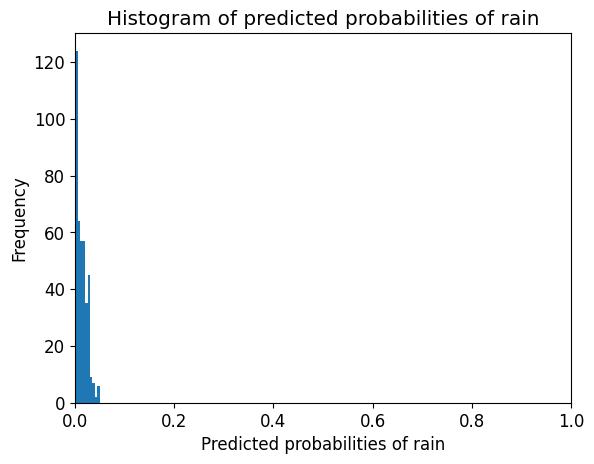

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, i/10)

    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

TypeError: binarize() takes 1 positional argument but 2 were given

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


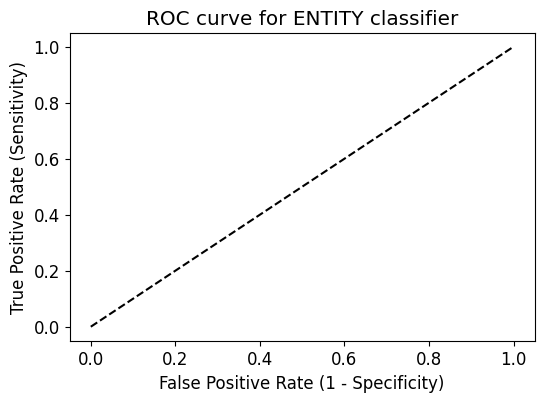

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for ENTITY classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores:[0.56923077 0.62769231 0.64307692 0.64615385 0.66975309]
